In [56]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import os
import glob

In [96]:
ps = [1.1, 1.2, 1.3]
ms = [0.1, 1.0, 10.0]

data_folders = [f"snapshots/snapshots_p{p}_m{m}".replace(".", "_") for p in ps for m in ms]
data_folders = ["../" + x for x in data_folders]
data_folders

['../snapshots/snapshots_p1_1_m0_1',
 '../snapshots/snapshots_p1_1_m1_0',
 '../snapshots/snapshots_p1_1_m10_0',
 '../snapshots/snapshots_p1_2_m0_1',
 '../snapshots/snapshots_p1_2_m1_0',
 '../snapshots/snapshots_p1_2_m10_0',
 '../snapshots/snapshots_p1_3_m0_1',
 '../snapshots/snapshots_p1_3_m1_0',
 '../snapshots/snapshots_p1_3_m10_0']

In [76]:
def get_last_data_file(dirpath):
    glob_pattern = f"{dirpath}/*.h5"
    files = glob.glob(glob_pattern)
    return files[-1]

def get_last_data_entry(dirpath):
    last_entry_path = get_last_data_file(dirpath)
    with h5.File(last_entry_path) as f:
        biomass = np.array(f["tasks"]["biomass"]).transpose(0, 2, 1)
        flux = np.array(f["tasks"]["flux"])

    return biomass, flux


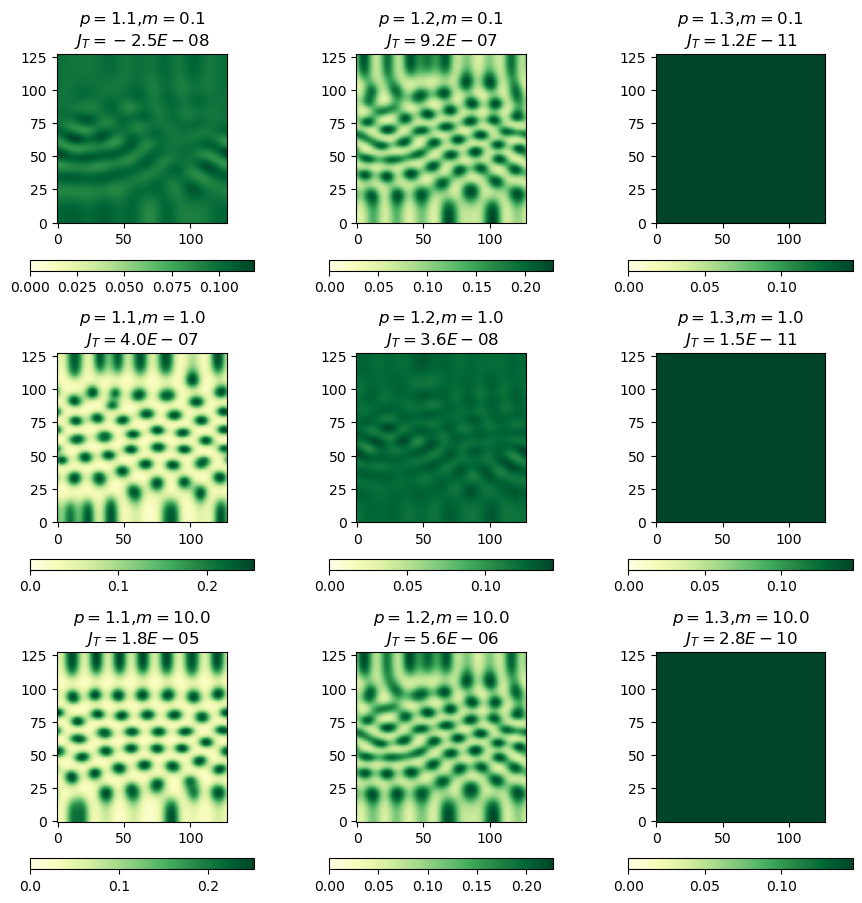

In [97]:
nx = len(ps)
ny = len(ms)

fig, axs = plt.subplots(ny, nx)

resize_factor = 3
fig.set_size_inches(resize_factor * nx, resize_factor * ny)
fig.tight_layout(h_pad=2.0, w_pad=2.0)

for i, p in enumerate(ps):
    for j, m in enumerate(ms):
        dirpath = "../" + f"snapshots/snapshots_p{p}_m{m}".replace(".", "_")
        biomass, flux = get_last_data_entry(dirpath)
        lims = (0, np.max(biomass[-1]))
        im = axs[j, i].imshow(biomass[-1], clim=lims, cmap="YlGn", origin="lower")
        fig.colorbar(im, location="bottom")

        total_flux = flux[-1, :, 0].sum()
        axs[j, i].set_title(f"$p={p}$,$m={m}$\n$J_T={total_flux:.1E}$") 

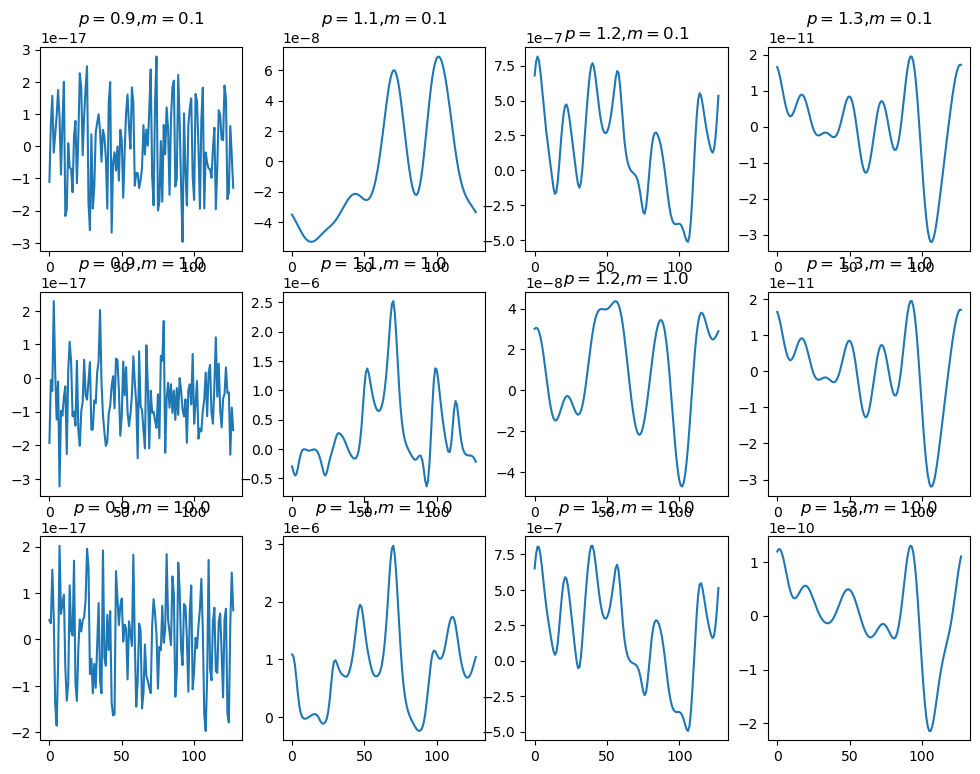

In [88]:
nx = len(ps)
ny = len(ms)

fig, axs = plt.subplots(ny, nx)

resize_factor = 3
fig.set_size_inches(resize_factor * nx, resize_factor * ny)

for i, p in enumerate(ps):
    for j, m in enumerate(ms):
        dirpath = "../" + f"snapshots/snapshots_p{p}_m{m}".replace(".", "_")
        biomass, flux = get_last_data_entry(dirpath)
        axs[j, i].plot(flux[-1].mean(axis=1))
        axs[j, i].set_title(f"$p={p}$,$m={m}$") 